In [1]:
import pandas as pd
from collections import Counter
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
#num_pd = pd.read_csv('dataset/train_numeric.csv',nrows = 10000)
num_pd = pd.read_csv('dataset/train_numeric.csv')

In [3]:
features = num_pd.drop(['Response', 'Id'], axis=1).columns.values

In [4]:
def organize(features):
    line_features = {}
    station_features = {}
    lines = set([f.split('_')[0] for f in features])
    stations = set([f.split('_')[1] for f in features])
    
    for l in lines:
        line_features[l] = [f for f in features if l+'_' in f]
        
    for s in stations:
        station_features[s] = [f for f in features if s+'_' in f]
        
            
    return line_features, station_features

line_features, station_features = organize(features)

In [5]:
line_error = []
for l in line_features:
    cols = ['Id', 'Response']
    cols.extend(line_features[l])
    df = num_pd.dropna(subset=line_features[l], how='all')
    #df = num_pd
    error_rate = df[df.Response == 1].size / float(df[df.Response == 0].size)
    line_error.append([df.shape[1]-2, df.shape[0], error_rate]) 
    
line_data = pd.DataFrame(line_error, 
                         columns=['Features', 'Samples', 'Error_Rate'], 
                         index=line_features).sort_index()

In [6]:
#line_data

In [7]:
line_data['Line ID'] = line_data.index
#line_data

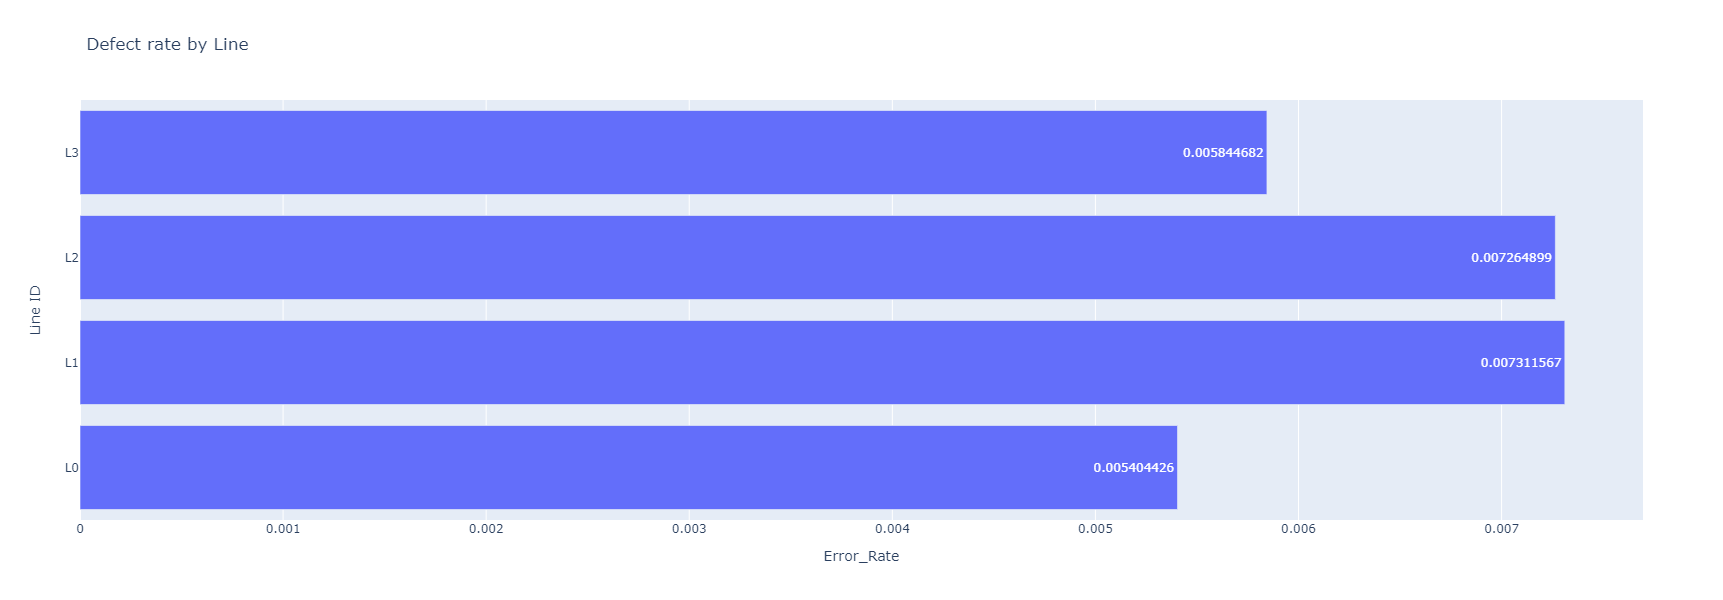

In [9]:
fig = px.bar(line_data, y='Line ID', x='Error_Rate',title="Defect rate by Line",text_auto=True,orientation='h',width=900,height=600)
fig.show()